# Gemini


By Alberto Valdes.

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Explanation

In [4]:
start = time.time()

### i. Install SDK of Google Generative AI

In [5]:
!pip install -q -U google-generativeai

### ii. Import Libraries

In [6]:
import google.generativeai as genai

In [7]:
from google.colab import userdata

In [8]:
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [9]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### iii. Create API Key

**Link:** https://aistudio.google.com/app/apikey

In [10]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [11]:
genai.configure(api_key = GOOGLE_API_KEY)

# 1. Using Gemini Pro

In [12]:
model = genai.GenerativeModel('gemini-pro')

# 2. Prompt Engineer

### i. Many scripts

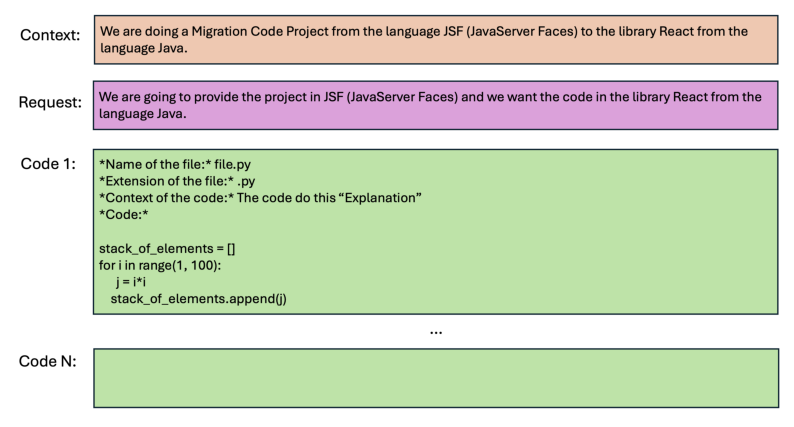

In [13]:
display_img('Many_Scripts.png', 10, 10)

### ii. Single script

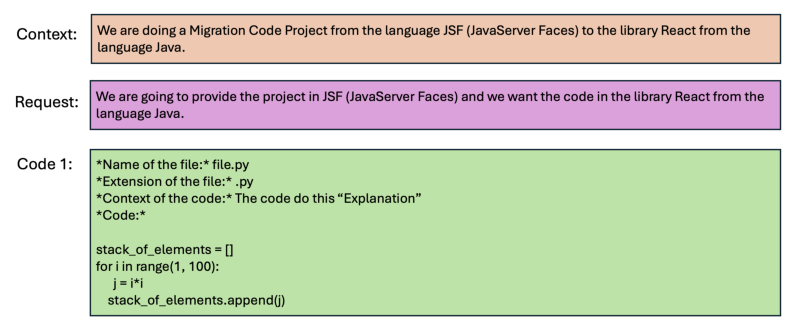

In [14]:
display_img('Single_Script.png', 10, 10)

### iii. Example

In [15]:
from_lg = 'Python'
to_lg = 'Java'

In [16]:
context = f'We are doing a Migration Code Project from the language {from_lg} to the language {to_lg}.'

In [17]:
request = f'We are going to provide the code in {from_lg} and we want the code in the language {to_lg}.'

In [18]:
name_file = 'code.py'
extension_file = '.py'
context_code = 'This code save the square of every digit from 1 to 100 in a stack'

In [19]:
code =  """
        stack_of_elements = []
        for i in range(1, 100):
          j = i*i
          stack_of_elements.append(j)

        print(stack_of_elements)
        """

In [20]:
prompt_code = f"""
        *Name of the file*: {name_file} \n
        *Extension of the file:*: {extension_file} \n
        *Context of the code:*: {context_code} \n

        *Code:* \n {code}
        """

In [21]:
print(prompt_code)


        *Name of the file*: code.py 

        *Extension of the file:*: .py 

        *Context of the code:*: This code save the square of every digit from 1 to 100 in a stack 


        *Code:* 
 
        stack_of_elements = []
        for i in range(1, 100):
          j = i*i
          stack_of_elements.append(j)

        print(stack_of_elements)
        
        


In [22]:
prompt = f"""
        Context: {context}

        Request: {request}

        Details of the Code:

        {prompt_code}

        """

In [23]:
print(prompt)


        Context: We are doing a Migration Code Project from the language Python to the language Java.

        Request: We are going to provide the code in Python and we want the code in the language Java.

        Details of the Code: 
          
        
        *Name of the file*: code.py 

        *Extension of the file:*: .py 

        *Context of the code:*: This code save the square of every digit from 1 to 100 in a stack 


        *Code:* 
 
        stack_of_elements = []
        for i in range(1, 100):
          j = i*i
          stack_of_elements.append(j)

        print(stack_of_elements)
        
        
          
        


In [24]:
%%time
response = model.generate_content(prompt)

CPU times: user 45.7 ms, sys: 10.1 ms, total: 55.8 ms
Wall time: 3.87 s


In [25]:
print(response.text)

````java
import java.util.Stack;

public class SquareOfDigits {

    public static void main(String[] args) {
        Stack<Integer> stackOfElements = new Stack<>();
        for (int i = 1; i <= 100; i++) {
            int j = i * i;
            stackOfElements.push(j);
        }

        System.out.println(stackOfElements);
    }
}
````


### Time of execution

In [26]:
end = time.time()

In [27]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 12 seconds.
